# Árbol de decisión para especies de flores

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
data.shape

(150, 5)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

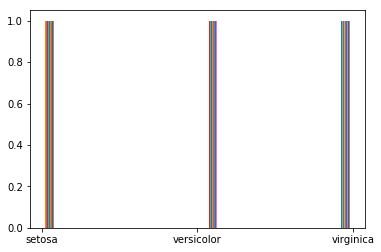

In [45]:
plt.hist(data.Species)

In [46]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [47]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [48]:
target

'Species'

In [49]:
import numpy as np

In [50]:
#Generamos una distribución uniforme entre 0 y 1 del 75% del dataset (para entrenamiento)
data["is_train"] = (np.random.uniform(0, 1, len(data))<=0.75).astype(int)

In [51]:
pd.DataFrame(data["is_train"]).head()

,is_train
0,1
1,1
2,1
3,0
4,0


In [52]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


(array([ 38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

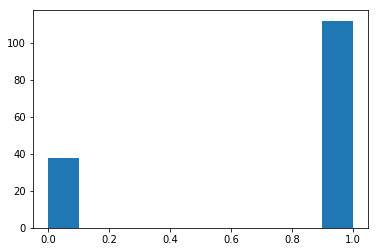

In [53]:
plt.hist(data.is_train)

In [54]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [57]:
preds = tree.predict(test[predictors])

In [58]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,12,0,0
versicolor,0,15,0
virginica,0,1,10


## Visualización del árbol de decisión

In [59]:
from sklearn.tree import export_graphviz

In [60]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [61]:
import os
from graphviz import Source

In [62]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.583\\nsamples = 112\\nvalue = [38, 35, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.998\\nsamples = 74\\nvalue = [0, 35, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.35\\nentropy = 0.485\\nsamples = 38\\nvalue = [0, 34, 4]"] ;\n2 -> 3 ;\n4 [label="Sepal.Width <= 2.55\\nentropy = 0.31\\nsamples = 36\\nvalue = [0, 34, 2]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.722\\nsamples = 10\\nvalue = [0, 8, 2]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 26\\nvalue = [0, 26, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8

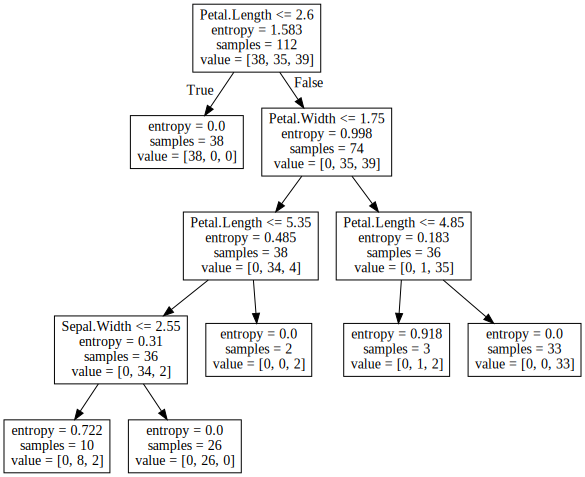

In [63]:
Source(text)

## Cross Validation para la poda

In [64]:
X = data[predictors]
Y = data[target]

In [65]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [66]:
from sklearn.cross_validation import KFold

In [67]:
cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [68]:
from sklearn.cross_validation import cross_val_score

In [69]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)

In [70]:
scores 

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [71]:
score = np.mean(scores)
score #Promedio de las eficacias de cada una de las divisiones (folds)

0.9333333333333333

In [72]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ", i, "es de ", score)
    print("   ", tree.feature_importances_)

Score para i =  1 es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2 es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3 es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [73]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [78]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.95      , 0.05      , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [79]:
forest.oob_score_

0.94